# PART I: Theory Questions

---

## 1. Question

In this question we are asked to sort the emergency calls based on their probability of being an actual emergency. To do that, we have a slick rule called Bayes' Theorem, something derived by our friendly neighborhood statistician, Thomas Bayes. Which states:

$$
P(A|B)
=
\frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where $A$ and $B$ are events. Explaining this theorem in detail:
- $P(A|B)$ is the conditional probability of $A$ given $B$.
- $P(B|A)$ is interpreted in a similar fashion with the former one.
- $P(A) \text{ and } P(B)$ are probabilities of $A \text{ and } B$ without any given conditions.

Or if we were to make a more general definition:

$\text{Let } A_1, A_2,...,A_k$ be a collection of $k$ mutually exclusive and exhaustive events with $prior$ probabilities $P(A_i) \text{ }(i = 1,...,k)$. Then for any other event $B$ for which $P(B) > 0$, the $posterior$ probability of $A_j$ given that $B$ has occured is:


$$
P(A_j|B)
=
\frac{P(B|A_j)\cdot P(A_j)}{\sum_{i=1}^{k} P(B|A_i)\cdot P(A_i)}
\qquad
j = 1, ... , k
$$

Now we can examine all cases one by one.

### 1st Neighborhood

We have these values:
- $P(D) = 0.01 \qquad$ Probability of dangerous fire
- $P(\text{Barbecue Smoke}) = 0.2$ 
- $P(S|D) = 0.8\qquad$ Probability of smoke given that there is a dangerous fire

Using the Bayes' Theorem, we need to solve this:

$$
P(D|S)
=
\frac{P(S|D) \cdot P(D)}{P(S)}
$$

Here we don't know the value of $P(S)$. But we can calculate it with the usage of law of total probability, assuming smoke is caused by only barbecue or a dangerous fire:

$$
P(S) = P(\text{Barbecue Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.2 + (0.8 \times 0.01)
$$

$$
= 0.208
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.8 \times 0.01}{0.208}
$$

$$
\approx  0.0385
$$

We can say for this case, the probability of a dangerous fire is approximately 3.85%.

### 2nd Neighborhood

We have these values:
- $P(D) = 0.35 \qquad$ Probability of dangerous fire
- $P(\text{Factory Smoke}) = 0.1$ 
- $P(S|D) = 0.01\qquad$ Probability of smoke given that there is a dangerous fire

Calculating $P(S)$: (Main Bayes' Theorem is the same, so it won't take place here explicitly.)

$$
P(S) = P(\text{Factory Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.1 + (0.35 \times 0.01)
$$

$$
= 0.1035
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.35 \times 0.01}{0.1035}
$$

$$
\approx  0.0338
$$

### 3rd Neighborhood

We have these values:
- $P(D) = 0.1 \qquad$ Probability of dangerous fire
- $P(\text{Coal Smoke}) = 0.8$ 
- $P(S|D) = 0.3\qquad$ Probability of smoke given that there is a dangerous fire

Calculating $P(S)$:

$$
P(S) = P(\text{Coal Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.8 + (0.3 \times 0.1)
$$

$$
= 0.83
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.3 \times 0.1}{0.83}
$$

$$
\approx  0.0361
$$

Comparing probabilities for all three cases $(P_1, P_2, P_3)$, we can sort them in this way:

$$
P_1 > P_3 > P_2
$$

---

## 2. Question

Let's visualize the boxes first:

| Box Name | Red Count | Blue Count | Pr. of Being Selected
|----------|-----------|------------|---------------------|
|   Box 1  |     5     |      3     |        0.4          |
|   Box 2  |     7     |      4     |        0.6          |

### 1st Case

Probability of a blue ball drawn is the sum of separate probabilities of a blue ball drawn from each box. For the first box:

$$
0.4 \times \frac{3}{8} = \frac{1.2}{8}
$$

For the second one:

$$
0.6 \times \frac{4}{11} = \frac{2.4}{11}
$$

Which makes a total of:

$$
\frac{1.2}{8} + \frac{2.4}{11} = \frac{32.4}{88}
$$

### 2nd Case

The probability of second box being selected ($P(S)$), if it is known that a blue ball is drawn ($P(B)$) can be calculated using Bayes' Theorem again:

$$
P(S|B) = \frac{P(B|S) \cdot P(S)}{P(B)}
$$

$P(B)$ was calculated as $\frac{32.4}{88}$ in the previous case. We already know other values too. Substituting:

$$
P(S|B) = \frac{\frac{4}{11} \cdot 0.6}{\frac{32.4}{88}}
$$

$$
= \frac{19.2}{32.4}
$$

---

## 3. Question

- Text classification is the primary application for Naïve Bayes classifier methods. (<span style="color: red;">T</span>) <span style="color: red;">Yes, it is mostly used for spam detection, sentiment analysis etc.</span>
- When an attribute value in the testing record has no example in the training set, the total posterior probability in a Naïve Bayes algorithm will be zero. (<span style="color: red;">T</span>) <span style="color: red;">True, and it's called the Zero Frequency Problem.</span>

---

# PART II: Movie Review Classification System

## Step 1: Importing and Visualizing Data

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

In [29]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
TRAIN_PATH = 'aclImdb/train/'
TEST_PATH = 'aclImdb/test/'

In [8]:
def load_data(path: str) -> pd.DataFrame:

    """
    Function to load the data from the aclImdb dataset

    :param path: Path to the train or test folder
    :return: a pandas DataFrame with the reviews and the sentiment
    """

    data = {'review': [], 'sentiment': []}
    
    for sentiment in ['pos', 'neg']:
        sentiment_path = os.path.join(path, sentiment)
        for filename in os.listdir(sentiment_path):
            if filename.endswith('.txt'):
                with open(os.path.join(sentiment_path, filename), 'r', encoding='utf-8') as file:
                    data['review'].append(file.read())
                    data['sentiment'].append(sentiment)
    return pd.DataFrame(data)

In [9]:
train_data = load_data(TRAIN_PATH)
test_data = load_data(TEST_PATH)

In [11]:
print(train_data.head())
print()
print(test_data.head())

                                              review sentiment
0  Bromwell High is a cartoon comedy. It ran at t...       pos
1  I liked the film. Some of the action scenes we...       pos
2  Somewhat funny and well-paced action thriller ...       pos
3  Just two comments....SEVEN years apart? Hardly...       pos
4  Another Aussie masterpiece, this delves into t...       pos

                                              review sentiment
0  I went and saw this movie last night after bei...       pos
1  Actor turned director Bill Paxton follows up h...       pos
2  As a recreational golfer with some knowledge o...       pos
3  I saw this film in a sneak preview, and it is ...       pos
4  Bill Paxton has taken the true story of the 19...       pos


<Axes: xlabel='sentiment', ylabel='count'>

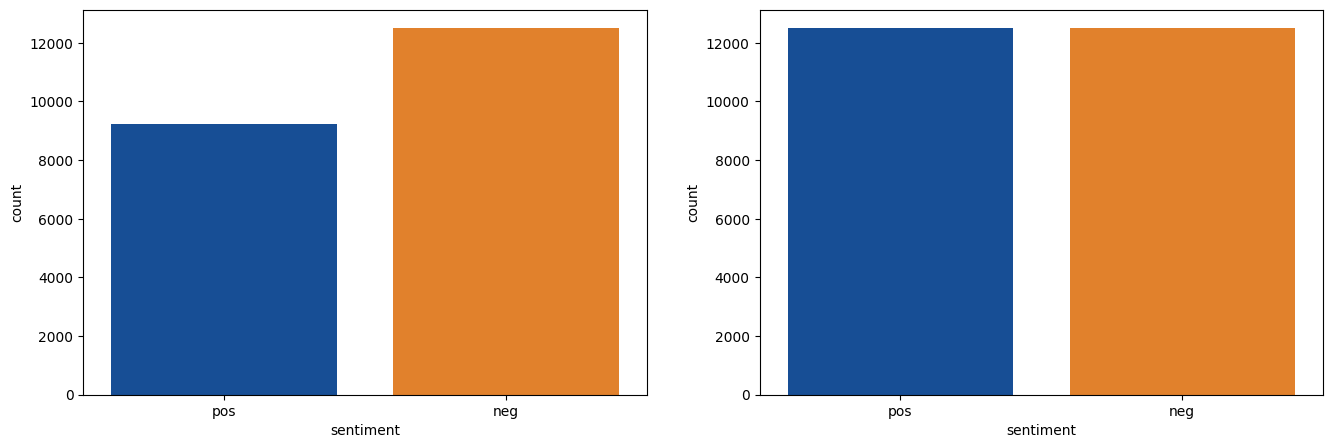

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
colors = ['#024CAA', '#FF7F0E']
sns.countplot(x='sentiment', data=train_data, ax=axes[0], palette=colors, hue='sentiment', legend=False)
sns.countplot(x='sentiment', data=test_data, ax=axes[1], palette=colors, hue='sentiment', legend=False)

---

## Step 2: BoW

In [32]:
from collections import defaultdict
import re

In [41]:
# defining stop words
stop_words = set([
    'the', 'is', 'and', 'in', 'to', 'of', 'a', 'i', 'it', 'that', 'on', 'for', 'with', 'as', 
    'this', 'was', 'but', 'be', 'at', 'by', 'an', 'he', 'she', 'they', 'them', 'we', 'you',
    'are', 'from', 'or', 'not', 'if', 'have', 'has', 'had', 'my', 'your', 'his', 'her', 'its',
    'which', 'so', 'there', 'will', 'would', 'can', 'could', 'our', 'their', 'what', 'when', 
    'where', 'who', 'how', 'just', 'about', 'more', 'up', 'out', 'into', 'no', 'than', 'some', 
    'other', 'only', 'such', 'do', 'over', 'did'
])

In [42]:
def tokenize(text):
    """
    A simple function to tokenize a text.

    :param text: A text
    :return: A list of words
    """
    words = re.findall(r'\b\w+\b', text.lower())
    return [word for word in words if word not in stop_words]

In [49]:
def bow(data, ngram=1):
    """
    Function to create a bag of words from a list of reviews

    :param data: A pandas DataFrame with the reviews and the sentiment
    :param ngram: The n-gram order (default=1)
    :return: A tuple with the positive and negative dictionaries
    """
    pos_dict = defaultdict(int)
    neg_dict = defaultdict(int)
    
    # over reviews and sentiments
    for _, row in data.iterrows():
        words = tokenize(row['review'])
        sentiment = row['sentiment']

        ngrams = zip(*[words[i:] for i in range(ngram)])  

        for ngram_tuple in ngrams:
            ngram_str = ' '.join(ngram_tuple)  # join tuple to form the n-gram string
            if sentiment == 'pos':
                pos_dict[ngram_str] += 1
            else:
                neg_dict[ngram_str] += 1

    return dict(pos_dict), dict(neg_dict)


unigram_train_pos, unigram_train_neg = bow(train_data, ngram=1)
bigram_train_pos, bigram_train_neg = bow(train_data, ngram=2)

In [52]:
len(unigram_train_pos)

48698